## Datasets

### Children's Book Test(CBT)
https://research.facebook.com/downloads/babi/ <br>
download link (134MB): <br>
http://www.thespermwhale.com/jaseweston/babi/CBTest.tgz <br>

### Intermediate Dataset
Science Fiction dataset (1.21GB)(selected): <br>
https://github.com/nschaetti/SFGram-dataset <br>
Fanfiction (largely written by adolescents) (725GB) (csv, not easy work with): <br> 
https://www.kaggle.com/metrovirus/fanfictionnet 

### Adult Reading
BBC News: <br>
https://www.kaggle.com/c/learn-ai-bbc (can not use) <br>
All the news (669.64MB) (selected): <br>
https://www.kaggle.com/datasets/snapcrack/all-the-news

## How to download data to your Github

In [1]:
# create a data folder
!mkdir raw_data

A subdirectory or file raw_data already exists.


In [9]:
# Download data from OneDrive and move the data to raw_data folder
# https://entuedu-my.sharepoint.com/:f:/g/personal/yang047_e_ntu_edu_sg/EtJcTA5lzDRNkwtHE0W8FAwBcDjnCHghMYNq6UCd2t82lA?e=2BoJ3w

In [10]:
# Please add to your github's .gitigonore file
# raw_data/
# So your github will not trying to upload these large data files to web

## Data Checking and Preprocessing

In [32]:
# working with CSV formated dataset
# for Allthenew, we only need the title and the content
import pandas as pd
import csv
import sys
import os
from pathlib import Path
import random

csv.field_size_limit(1000000000)

1000000000

### Adult set - Allthenews

In [2]:
data_loc = "raw_data"
adult_loc = "/Allthenews"

In [4]:
#check data in pandas
df = pd.read_csv(data_loc + adult_loc +'/articles1.csv',index_col=0)

In [5]:
df.head(3)

,id,title,publication,author,date,year,month,url,content
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."


In [5]:
# create a small file for testing
df.head(3).to_csv(data_loc + adult_loc +'/test.csv',index=False) 

In [8]:
# convert csv file to text file
def csv_converter(input_file, output_file):
    
    with open(input_file, newline='', encoding="utf8") as csvfile:
        spamreader = csv.DictReader(csvfile, delimiter=',')

        with open(output_file, 'w', encoding="utf8") as f:

            for row in spamreader:
                # print(row['id'])
                # print(row['title'])
                # print(row['content'])

                # process the csv file into text file like wiki-text
                f.write(row['id'])
                f.write('\n')
                f.write(row['title'])
                f.write('\n')
                f.write(row['content'])
                f.write('\n')
                f.write('\n')

In [9]:
# test the funciton on small test setß
test_input = data_loc + adult_loc +'/test.csv'
test_output = data_loc + adult_loc+'/test.txt'

In [10]:
csv_converter(test_input, test_output)

In [9]:
# loop over all news files
Allthenews_filenames = ['articles1', 'articles2', 'articles3']

In [10]:
# convert all Allthenews files
# take about 30 seconds
for name in Allthenews_filenames:
    csv_input = data_loc + adult_loc + "/" + name + '.csv'
    text_output = data_loc + adult_loc + "/" + name + '.txt'
    csv_converter(csv_input, text_output)

### Child set - child_CBT
file already in text format

### Intermediate set - fanfiction

In [80]:
# fanfiction
# problems, csv, different language than english
interm_loc = "/fanfiction/Fanfiction.net/stories"

In [81]:
harrypotter_loc = "/book/Harry-Potter.csv"

In [85]:
data_loc + interm_loc + harrypotter_loc

'raw_data/fanfiction/stories/book/Harry-Potter.csv'

In [88]:
#check data in pandas
df2 = pd.read_csv(data_loc + interm_loc + harrypotter_loc, on_bad_lines='skip')

In [110]:
# fanfiction not easy work with

In [ ]:
df2.head(3)

In [113]:
# SFGram-dataset
# text file, easiler to work with
interm_loc = "/fanfiction/SFGram-dataset-master/book-contents/"

In [114]:
path_interm = data_loc + interm_loc

In [116]:
# check text file
!head raw_data/fanfiction/SFGram-dataset-master/book-contents/book00001.txt

The Time Machine, by H. G. Wells [1898]
I
The Time Traveller (for so it will be convenient to speak of him)
was expounding a recondite matter to us. His grey eyes shone and
twinkled, and his usually pale face was flushed and animated. The
fire burned brightly, and the soft radiance of the incandescent
lights in the lilies of silver caught the bubbles that flashed and
passed in our glasses. Our chairs, being his patents, embraced and
caressed us rather than submitted to be sat upon, and there was that
luxurious after-dinner atmosphere when thought roams gracefully


In [112]:
# need to deal with fixed line length, in curpus this is taken care of

Now all needed datesets are in .txt format

## Data Analysis

### Create Sample Data

https://programminghistorian.org/en/lessons/counting-frequencies

https://colab.research.google.com/drive/1n4CT-J7DbEPWGr5QjB0fREoV8Gp9tgyA

In [47]:
# Process file line by line until reach required word sample size
sample_size = 100_000

In [34]:
# sampling from the data files
# https://stackoverflow.com/questions/53726828/how-to-randomly-sample-files-from-a-filesystem-in-python

In [35]:
# select sample files
pathlist = Path(data_loc + adult_loc).glob('articles*.txt')
nof_samples = 10

rc = []
for k, path in enumerate(pathlist):
    if k < nof_samples:
        rc.append(str(path)) # because path is object not string
    else:
        i = random.randint(0, k)
        if i < nof_samples:
            rc[i] = str(path)

print(len(rc))
print(rc)

3
['raw_data\\Allthenews\\articles1.txt', 'raw_data\\Allthenews\\articles2.txt', 'raw_data\\Allthenews\\articles3.txt']


In [48]:
fw = open(data_loc + adult_loc +"/adult_sample.txt", "w", encoding="utf8")
size = 0

for file_path in rc:
    with open(file_path, 'r', encoding="utf8") as f:
        for line in f:
            if size >= sample_size:
                break
            fw.write(line)
            size+= len(line.split())
fw.close()

In [49]:
rc[1]

'raw_data\\Allthenews\\articles2.txt'

### Analyze Samples

In [50]:
class WordAnalysis(object):
    def __init__(self):
        self.wordsfreq = {}
        self.wordslen = {}
        self.words = []
        
    def add_word(self, word):
        if word not in self.words:
            self.words.append(word)
            self.wordsfreq[word] = 1
            word_len = len(word)
            
            if word_len in self.wordslen:
                self.wordslen[word_len] += 1
            else:
                self.wordslen[word_len] = 1
        else:
            self.wordsfreq[word] += 1
            word_len = len(word)
            self.wordslen[word_len] += 1

In [51]:
class Corpus(object):
    def __init__(self, path):
        self.analysis = WordAnalysis()
        self.data = self.process(os.path.join(path))

    def process(self, path):
        assert os.path.exists(path)
        # Add words to the dictionary
        with open(path, 'r', encoding="utf8") as f:
            for line in f:
                words = line.split() + ['<eos>']
                for word in words:
                    self.analysis.add_word(word)

        return 0

In [52]:
# Allthenews text.txt
file_source = data_loc + adult_loc +'/adult_sample.txt'

In [53]:
corpus = Corpus(file_source)

In [54]:
len(corpus.analysis.words)

9292

In [44]:
corpus.analysis.wordslen

{5: 11743,
 11: 1703,
 4: 15001,
 7: 8629,
 6: 9474,
 1: 3920,
 3: 19472,
 10: 2922,
 13: 429,
 2: 15277,
 15: 79,
 8: 6197,
 14: 244,
 9: 4419,
 16: 34,
 12: 840,
 17: 20,
 22: 1,
 21: 2,
 18: 2,
 19: 1}

In [45]:
# average word length


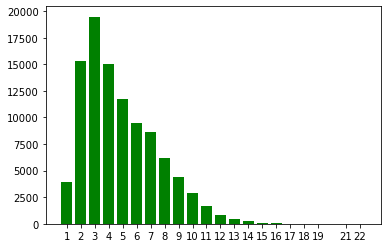

In [46]:
import matplotlib.pyplot as plt

word_feq = corpus.analysis.wordslen

plt.bar(list(word_feq.keys()), word_feq.values(), color='g')
plt.xticks(list(word_feq.keys()))
plt.show()

In [ ]:
# process a test file
with open(file_source, 'r',  encoding="utf8") as file:
    for line in file:
        # print(line.rstrip())
        # print("-------")
        
        # add randomness 